In [105]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [106]:
# read data
data = pd.read_csv('default.csv')

# ------ data pre-processing ------
# check structure of the data
# 30,000 rows. 23 attributes. 1 label column.
data.info()
data.head()

# check the statistical summary of the data
data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL       30000 non-null int64
SEX             30000 non-null int64
EDUCATION       30000 non-null int64
MARRIAGE        30000 non-null int64
AGE             30000 non-null int64
PAY_9           30000 non-null int64
PAY_8           30000 non-null int64
PAY_7           30000 non-null int64
PAY_6           30000 non-null int64
PAY_5           30000 non-null int64
PAY_4           30000 non-null int64
BILL_AMOUNT9    30000 non-null int64
BILL_AMOUNT8    30000 non-null int64
BILL_AMOUNT7    30000 non-null int64
BILL_AMOUNT6    30000 non-null int64
BILL_AMOUNT5    30000 non-null int64
BILL_AMOUNT4    30000 non-null int64
PAY_AMOUNT9     30000 non-null int64
PAY_AMOUNT8     30000 non-null int64
PAY_AMOUNT7     30000 non-null int64
PAY_AMOUNT6     30000 non-null int64
PAY_AMOUNT5     30000 non-null int64
PAY_AMOUNT4     30000 non-null int64
DEFAULT         30000 non-null int64
dty

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_9,PAY_8,PAY_7,PAY_6,PAY_5,...,BILL_AMOUNT6,BILL_AMOUNT5,BILL_AMOUNT4,PAY_AMOUNT9,PAY_AMOUNT8,PAY_AMOUNT7,PAY_AMOUNT6,PAY_AMOUNT5,PAY_AMOUNT4,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [107]:
# define column names
data.columns = ['LimitBalance', 'Sex', 'Education', 'Marital_Status', 'Age', 'Repayment_Sept',
                'Repayment_Aug', 'Repayment_July', 'Repayment_June', 'Repayment_May', 'Repayment_Apr',
                'BillAmt_Sept', 'BillAmt_Aug', 'BillAmt_July', 'BillAmt_June','BillAmtMay', 'BillAmt_Apr',
                'PaymentAmt_Sept', 'PaymentAmt_Aug', 'PaymentAmt_July', 'PaymentAmt_June', 'PaymentAmt_May',
                'PaymentAmt_Apr', 'default']

# check the null values in each column. no null
print(data.isnull().sum())

# replace missing characters as NaN
# data = data.replace('?', np.NaN, inplace=False)

LimitBalance       0
Sex                0
Education          0
Marital_Status     0
Age                0
Repayment_Sept     0
Repayment_Aug      0
Repayment_July     0
Repayment_June     0
Repayment_May      0
Repayment_Apr      0
BillAmt_Sept       0
BillAmt_Aug        0
BillAmt_July       0
BillAmt_June       0
BillAmtMay         0
BillAmt_Apr        0
PaymentAmt_Sept    0
PaymentAmt_Aug     0
PaymentAmt_July    0
PaymentAmt_June    0
PaymentAmt_May     0
PaymentAmt_Apr     0
default            0
dtype: int64


In [108]:
# ------ Exploratory Data Analysis
# Plot social factors
data['Education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: Education, dtype: int64

In [109]:
data['edu_flag'] = data['Education'].apply(lambda x:'y' if 0 < x < 5 else 'n')

In [110]:
data['edu_flag'].value_counts()

y    29655
n      345
Name: edu_flag, dtype: int64

In [111]:
data_edu = data[data['edu_flag'] == 'y']

In [112]:
data_edu['EDUCATION'] = data_edu['Education'].apply(lambda x:  \
                                                 'graduate school' if x==1 \
                                                else ('university' if x==2 \
                                                     else ('high school' if x==3 else 'others')))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


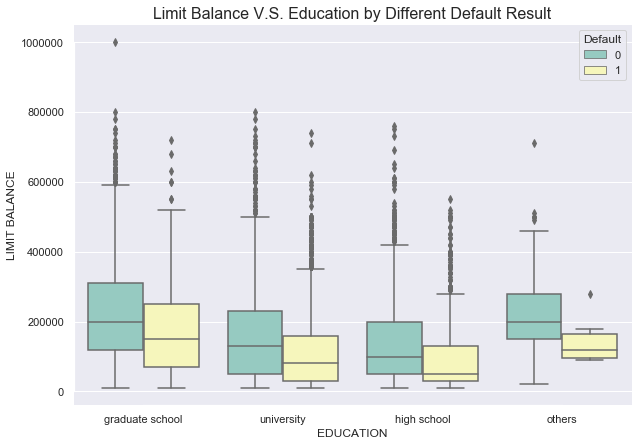

In [135]:
# legend: how to change 1 to yes 0 to no
# color: how to change them to blue and orange

# sns.set_style("whitegrid")
sns.set_style("ticks")
# sns.set(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(10,7)}) 
g = sns.boxplot(x='EDUCATION', y='LimitBalance',
            hue='default', palette='Set3',
            data=data_edu, order = ['graduate school','university','high school','others'])

# plt.legend(loc='upper right') #vertical legend # , bbox_to_anchor=(1.10, 1.0), ncol=1
plt.legend(title='Default', loc='upper right')
    
plt.xlabel('EDUCATION')
plt.ylabel('LIMIT BALANCE')
plt.title('Limit Balance V.S. Education by Different Default Result', size=16)
# plt.legend()
plt.savefig("edu.jpg")
sns.despine(offset=0, trim=True)

In [136]:
# repayment history
data.head()

,LimitBalance,Sex,Education,Marital_Status,Age,Repayment_Sept,Repayment_Aug,Repayment_July,Repayment_June,Repayment_May,...,BillAmtMay,BillAmt_Apr,PaymentAmt_Sept,PaymentAmt_Aug,PaymentAmt_July,PaymentAmt_June,PaymentAmt_May,PaymentAmt_Apr,default,edu_flag
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,y
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,y
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,y
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,y
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,y
